# Vylepsenia

Takze! Framework nam stoji a funguje. Teraz by sme sa s nim mohli trochu pohrat.


In [1]:
import numpy as np

from utils import dataset_Circles, draw_DecisionBoundary, draw_TrainingResults
from layer import Input, Dense
from loss import CreateLossFunction
from optimizer import GradientDescent
from model import Model


## 1. Underfit & Overfit

Kazdy machine learning problem je iny, a tazko dopredu odhadnut, aka kombinacia architektury siete a hyperparametrov bude fungovat najlepsie. Riesenie ML problemu je iterativny proces, pri ktorom sa skusaju rozne napady/moznosti/kombinacie.

Underfit a Overfit su situacie, ktore sa velmi casto vyskytuju a je dobre im rozumiet a vediet ich identifikovat.

### Underfit

Je situacia, pri ktorej siet nema dostatocnu kapacitu na to, aby sa dokazala "naucit" riesit problem. Je pre nu typicke, ze ma nizku (nie optimalnu) uspesnost uz pri trenovani.

Epoch 0:  Loss = 0.6284340   Val_Loss = 0.6518136
Epoch 5000:  Loss = 0.0948142   Val_Loss = 0.1120063
Epoch 10000:  Loss = 0.0743430   Val_Loss = 0.0869116
Epoch 15000:  Loss = 0.0683856   Val_Loss = 0.0769052
Training complete.
Epoch 19999:  Loss = 0.0659359   Val_Loss = 0.0730943


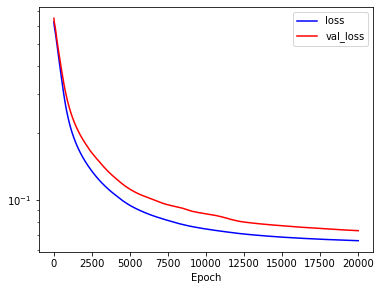

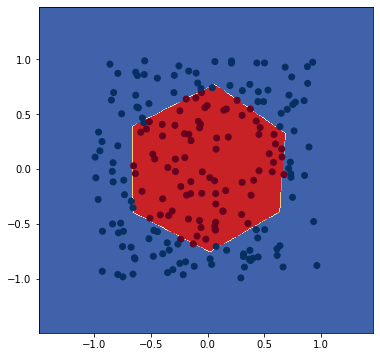

In [5]:
def test_Underfit():

    np.random.seed(10)

    # Spravime dataset
    X, Y = dataset_Circles(m=5000, noise=0.2)
    devX, devY = dataset_Circles(m=1000, noise=0.2)

    nx, m = X.shape
    ny, _ = Y.shape

    # Skusime otestovat, ci nam to dobre funguje
    model = Model([
        Input(nx),
        Dense(5, act='relu'),
        Dense(ny, act='sigmoid')
    ])

    # Inicializujeme model
    model.initialize(loss=CreateLossFunction('bce'), optimizer=GradientDescent(0.1))

    # Ucime
    results = model.train(X, Y, 20000, 0, devX, devY, verboseInterval=5000)

    # Kreslime vysledok
    draw_TrainingResults(results)
    draw_DecisionBoundary(devX, devY, model)

test_Underfit()